In [327]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [328]:
dataset = pd.read_csv('features_final.csv') # uploading dataset 
dataset.dtypes

iata                   object
airport_name           object
latitude_deg          float64
longitude_deg         float64
iso_country            object
country                object
seaport_count           int64
airport_count           int64
build_count             int64
industrial_count        int64
tourism_count           int64
terminal_count          int64
runways_count           int64
name_city_1            object
dist_city_1           float64
population_city_1     float64
name_city_2            object
dist_city_2           float64
population_city_2     float64
name_city_3            object
dist_city_3           float64
population_city_3     float64
population_around     float64
elevation_ft          float64
lighted               float64
max_length_ft         float64
width_ft              float64
aptclass               object
apttype                object
authority              object
humuse                 object
natural_dis_risk      float64
informrisk            float64
lpi_custom

In [329]:
dataset = dataset[["iata", "iso_country", "seaport_count", "airport_count", "build_count", "industrial_count", "tourism_count", "terminal_count", "runways_count", "name_city_1", "population_city_1", "dist_city_1", "name_city_2", "population_city_2", "dist_city_2", "name_city_3", "population_city_3", "dist_city_3", "population_around", "elevation_ft", "lighted", "max_length_ft", "width_ft", "aptclass", "apttype", "authority", "humuse", "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "gard", "airport_area", "airport_type"]]
dataset

iata iso_country  seaport_count  airport_count  build_count  \
0    AAC          EG              0              2           74   
1    AAE          DZ              0              1           95   
2    AAZ          GT              0              5         2465   
3    ABD          IR              0              2          383   
4    ABS          EG              0              1          101   
..   ...         ...            ...            ...          ...   
966  ZNZ          TZ              0              1        55685   
967  ZOS          CL              0              3          137   
968  ZPC          CL              0              1         4268   
969  ZYL          BD              0              5        12179   
970  ZZU          MW              0              0        42239   

     industrial_count  tourism_count  terminal_count  runways_count  \
0                 276           1362               1              1   
1                 111            237               2              2   
2                  82           1279               2              1   
3                2308            829               1              2   
4                   3             24               0              2   
..                ...            ...             ...            ...   
966              1870           3485               0              1   
967               416           1334               1              2   
968               179           1114               0              1   
969                33            395               1              1   
970                13            105               2              1   

            name_city_1  ...   apttype  authority humuse  natural_dis_risk  \
0                 Arish  ...   Airport      Civil     No               4.9   
1                Annaba  ...   Airport      Civil     No               4.7   
2        Quetzaltenango  ...  Airfield      Civil     No               6.7   
3                Abadan  ...   Airport      Civil     No               6.8   
4            Abu Simbel  ...  Airfield      Civil     No               4.9   
..                  ...  ...       ...        ...    ...               ...   
966       Zanzibar City  ...   Airport      Civil     No               5.1   
967     Osorno Province  ...  Airfield      Civil     No               6.2   
968     Cautín Province  ...  Airstrip      Civil     No               6.2   
969  Sunamganj District  ...   Airport      Civil     No               8.2   
970               Mzuzu  ...   Airport      Civil     No               4.5   

     informrisk lpi_customs  lpi_infrastructure  gard  airport_area  \
0           5.1        2.67                2.91   NaN       3918622   
1           3.9        2.28                2.45   NaN       3726703   
2           5.5        2.35                2.27   NaN        715718   
3           5.0        2.46                2.67   NaN       3501077   
4           5.1        2.67                2.91   NaN       4203655   
..          ...         ...                 ...   ...           ...   
966         5.1        2.66                2.72   NaN       2506390   
967         2.8        3.23                3.09   NaN        935325   
968         2.8        3.23                3.09   NaN        446403   
969         5.8        2.33                2.36   NaN       1986265   
970         4.8        2.58                2.56   NaN        322805   

       airport_type  
0    medium_airport  
1    medium_airport  
2     small_airport  
3    medium_airport  
4    medium_airport  
..              ...  
966   large_airport  
967  medium_airport  
968   small_airport  
969  medium_airport  
970  medium_airport  

[971 rows x 34 columns]

In [330]:
# replacing missing values in population and distance with 0

dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]] = dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]].fillna(0)

In [331]:
dataset["population_around"] = dataset["population_city_1"] + dataset["population_city_2"] + dataset["population_city_3"]
dataset[["tourism_count", "industrial_count"]]

tourism_count  industrial_count
0             1362               276
1              237               111
2             1279                82
3              829              2308
4               24                 3
..             ...               ...
966           3485              1870
967           1334               416
968           1114               179
969            395                33
970            105                13

[971 rows x 2 columns]

In [332]:
dataset["tourism_count"] = dataset['tourism_count'].replace(0,1) # replacing 0 with 1, so that there is no dividing by 0 when calculating the ratio
dataset["industrial_count"] = dataset['industrial_count'].replace(0,1)
dataset["tourism_industrial_ratio"] = dataset["tourism_count"] / dataset["industrial_count"]
dataset["tourism_industrial_ratio"]

0       4.934783
1       2.135135
2      15.597561
3       0.359185
4       8.000000
         ...    
966     1.863636
967     3.206731
968     6.223464
969    11.969697
970     8.076923
Name: tourism_industrial_ratio, Length: 971, dtype: float64

In [333]:
dataset = dataset[["iata", "iso_country", "seaport_count", "airport_count", "build_count", "tourism_industrial_ratio", "terminal_count", "runways_count", "dist_city_1", "dist_city_2", "dist_city_3", "population_around", "elevation_ft", "lighted", "max_length_ft", "width_ft", "aptclass", "apttype", "authority", "humuse", "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "gard", "airport_area", "airport_type"]]
dataset.dtypes

iata                         object
iso_country                  object
seaport_count                 int64
airport_count                 int64
build_count                   int64
tourism_industrial_ratio    float64
terminal_count                int64
runways_count                 int64
dist_city_1                 float64
dist_city_2                 float64
dist_city_3                 float64
population_around           float64
elevation_ft                float64
lighted                     float64
max_length_ft               float64
width_ft                    float64
aptclass                     object
apttype                      object
authority                    object
humuse                       object
natural_dis_risk            float64
informrisk                  float64
lpi_customs                 float64
lpi_infrastructure          float64
gard                         object
airport_area                  int64
airport_type                 object
dtype: object

In [334]:
dataset_train, dataset_test = train_test_split(
    dataset,  test_size=0.33, random_state=42)

dataset_train

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   
..   ...         ...            ...            ...          ...   
106  BMO          MM              0              1          213   
270  ELG          DZ              0              0          127   
860  TKG          ID              0              1          276   
435  KAC          SY              0              2          892   
102  BLG          MY              0              1           64   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   
..                        ...             ...            ...          ...   
106                 27.750000               0              1         1.33   
270                 69.000000               2              2         5.01   
860                  3.517241               1              2        23.10   
435                  1.375000               3              1         3.96   
102                 15.250000               0              1        24.74   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil          No               7.4   
90         37.27  ...  Airfield           Civil          No               5.8   
911        25.26  ...  Airfield  Civil/Military     Unknown               5.6   
181        26.60  ...   Airport  Civil/Military          No               5.2   
274         3.37  ...   Airport           Civil     Unknown               6.7   
..           ...  ...       ...             ...         ...               ...   
106        10.73  ...  Airstrip           Civil          No               7.8   
270         0.00  ...   Airport           Civil          No               4.7   
860        42.78  ...  Airfield           Civil          No               7.7   
435        63.70  ...  Airstrip           Civil  Connection               5.7   
102        88.14  ...       NaN             NaN         NaN               4.9   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922         3.7         2.86               2.92  NaN       955864   
90          5.2         2.19               2.20  NaN       748359   
911         2.4         2.15               2.09  NaN      2317842   
181         3.8         2.57               2.39  yes      3730055   
274         5.4         2.50               2.58  NaN       853011   
..          ...          ...                ...  ...          ...   
106         6.3         2.21               2.11  NaN       378722   
270         3.9         2.28               2.45  NaN      4126619   
860         4.8         2.69               2.81  NaN       960113   
435         7.3         1.70               2.12  NaN      3189011   
102         3.1         3.06               3.30  NaN        35414   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  
..              ...  
106   small_airport  
270  medium_airport  
860  medium_airport  
435  medium_airport  
102   small_airport  

[650 rows x 27 columns]

In [323]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [324]:
numeric_features = dataset_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = dataset_train.select_dtypes(include=['object']).drop(['iata'], axis=1).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [325]:

process = Pipeline(steps=[('preprocessor', preprocessor)])

In [316]:
preprocessor.fit(dataset_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['seaport_count', 'airport_count', 'build_count',
       'tourism_industrial_ratio', 'terminal_count', 'runways_count',
       'dist_city_1', 'dist_city_2', 'dist_city_3', 'population_around',
       'elevation_ft', 'lighted', 'max_length_ft', 'width_ft',
       'natural_dis_risk', 'informrisk', 'lpi_customs', 'lpi_infrastructure',
       'airport_area'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                             

In [335]:

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(numeric_features)
imp.transform(numeric_features)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'seaport_count'

In [320]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore') # encoding categorical features 
enc.fit(dataset_train)
enc.categories_

[array(['AAE', 'ABD', 'ABS', 'ACA', 'ADB', 'ADD', 'ADJ', 'ADU', 'ADZ',
        'AEG', 'AEP', 'AEU', 'AFL', 'AFT', 'AFZ', 'AGA', 'AGR', 'AGU',
        'AHU', 'AJL', 'AKY', 'ALG', 'AMH', 'AMQ', 'ANF', 'ANS', 'AOE',
        'AOR', 'AQJ', 'AQP', 'ARD', 'ARI', 'ASR', 'ASW', 'ATP', 'ATQ',
        'AUC', 'AUY', 'AVI', 'AWB', 'AXU', 'AYP', 'AYT', 'AZS', 'BAG',
        'BAQ', 'BCA', 'BCD', 'BDJ', 'BDP', 'BDQ', 'BEF', 'BGA', 'BHI',
        'BHO', 'BHU', 'BIK', 'BIR', 'BJA', 'BJB', 'BJM', 'BJR', 'BJV',
        'BKM', 'BKS', 'BKZ', 'BLG', 'BLJ', 'BLR', 'BLZ', 'BMO', 'BMV',
        'BNP', 'BNS', 'BNX', 'BNY', 'BOC', 'BOG', 'BOM', 'BPN', 'BRC',
        'BRM', 'BRX', 'BSC', 'BSO', 'BSR', 'BSX', 'BTC', 'BTH', 'BTJ',
        'BTO', 'BUI', 'BUN', 'BWA', 'BXR', 'BXU', 'BXW', 'BYM', 'BZI',
        'BZL', 'BZV', 'CAJ', 'CAP', 'CBB', 'CBH', 'CBO', 'CCA', 'CCJ',
        'CCN', 'CCS', 'CCU', 'CDP', 'CEB', 'CEN', 'CFG', 'CGM', 'CGP',
        'CHM', 'CHX', 'CIJ', 'CJB', 'CJL', 'CJN', 'CJS', 'CKZ', 'CLO',
      

In [194]:
elevation = dataset[["elevation_ft"]]


imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(elevation)
elevation_inputed = imp.transform(elevation)

In [195]:
apttype = dataset[["apttype"]]
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="Unknown")
imp.fit_transform(apttype)


array([['Airport'],
       ['Airport'],
       ['Airfield'],
       ['Airport'],
       ['Airfield'],
       ['Airfield'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airfield'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Unknown'],
       ['Airport'],
       ['Airstrip'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Unknown'],
       ['Airfield'],
       ['Airstrip'],
       ['Airfield'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airfield'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Unknown'],
       ['Airfield'],
       ['Airport'],
       ['Airport'],
       ['Airfield'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Airport'],
       ['Unknown'],
       ['Airport'],
       ['

In [242]:
dataset['lighted'] = dataset['lighted'].fillna(0)

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
dataset['apttype'] = dataset['apttype'].fillna("Unknown")
dataset['aptclass'] = dataset['aptclass'].fillna("Unknown")
dataset['authority'] = dataset['authority'].fillna("Unknown")
dataset['humuse'] = dataset['humuse'].fillna("Unknown")
dataset['gard'] = dataset['gard'].fillna("no")




/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [166]:
dataset['build_count'].value_counts()

1        15
2        15
0        14
4        12
14        9
         ..
21647     1
967       1
36690     1
34375     1
4516      1
Name: build_count, Length: 687, dtype: int64

In [ ]:
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [270]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore') # encoding categorical features 
X = dataset[['airport_type','apttype','iso_country', 'aptclass', 'authority', 'humuse', 'gard', 'lighted']]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [271]:
enc.transform([['large_airport', 'airport', 'EG', 'Domestic', 'authority', 'no', 'yes', '1']]).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.]])

In [272]:
enc.categories_

[array(['large_airport', 'medium_airport', 'small_airport'], dtype=object),
 array(['Airfield', 'Airport', 'Airstrip', 'Helipad', 'Unknown'],
       dtype=object),
 array(['AF', 'AR', 'AZ', 'BA', 'BD', 'BI', 'BO', 'BR', 'CG', 'CL', 'CO',
        'CU', 'DJ', 'DO', 'DZ', 'EC', 'EG', 'EH', 'ET', 'GE', 'GT', 'HN',
        'HT', 'ID', 'IN', 'IQ', 'IR', 'JM', 'JO', 'KG', 'LB', 'LK', 'LY',
        'MA', 'MM', 'MW', 'MX', 'MY', 'NI', 'NP', 'PA', 'PE', 'PG', 'PH',
        'PK', 'RW', 'SB', 'SR', 'SV', 'SY', 'TJ', 'TL', 'TO', 'TR', 'TZ',
        'US', 'VE', 'VN', 'VU'], dtype=object),
 array(['Domestic', 'International', 'Unknown'], dtype=object),
 array(['Civil', 'Civil/Military', 'Military', 'Private', 'Unknown'],
       dtype=object),
 array(['Closed', 'Connection', 'Helipad', 'Hub', 'No', 'Planned',
        'Unknown', 'Upon Request', 'Yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array([0., 1.])]

array([[<AxesSubplot:title={'center':'airport_count'}>]], dtype=object)

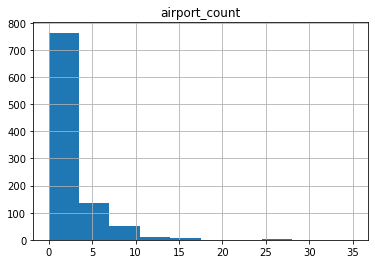

In [286]:
dataset.hist(column='airport_count') # fixinng the positive skew is needed

In [288]:
airport_count = dataset['airport_count']
airport_count

0      2
1      1
2      5
3      2
4      1
      ..
966    1
967    3
968    1
969    5
970    0
Name: airport_count, Length: 971, dtype: int64

array([[<AxesSubplot:title={'center':'seaport_count'}>]], dtype=object)

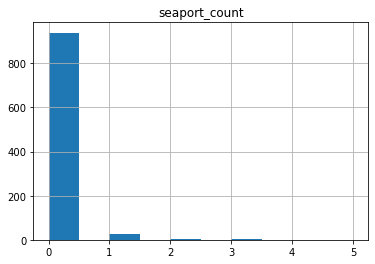

In [201]:
dataset.hist(column='seaport_count')

array([[<AxesSubplot:title={'center':'build_count'}>]], dtype=object)

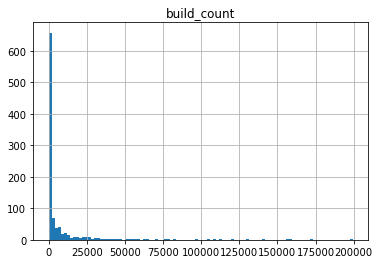

In [279]:
dataset.hist(column='build_count', bins=100)

array([[<AxesSubplot:title={'center':'tourism_industrial_ratio'}>]],
      dtype=object)

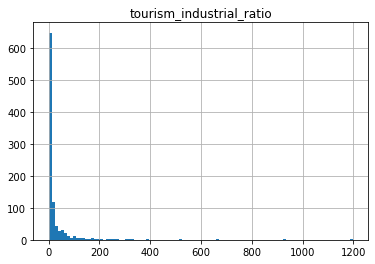

In [227]:
dataset.hist(column='tourism_industrial_ratio', bins=100)

array([[<AxesSubplot:title={'center':'terminal_count'}>]], dtype=object)

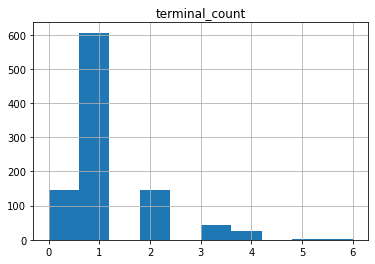

In [205]:
dataset.hist(column='terminal_count', bins = 10)

array([[<AxesSubplot:title={'center':'runways_count'}>]], dtype=object)

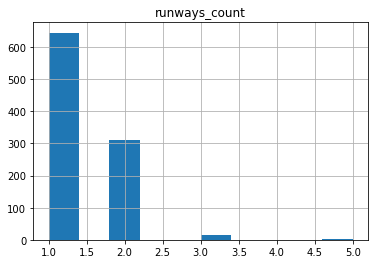

In [206]:
dataset.hist(column='runways_count')

array([[<AxesSubplot:title={'center':'population_around'}>]], dtype=object)

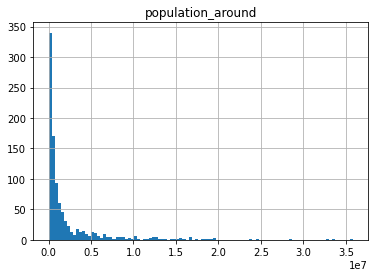

In [226]:
dataset.hist(column='population_around', bins=100)

0       121.0
1        16.0
2         NaN
3        10.0
4       616.0
        ...  
966      54.0
967     187.0
968     853.0
969      50.0
970    4115.0
Name: elevation_ft, Length: 971, dtype: float64

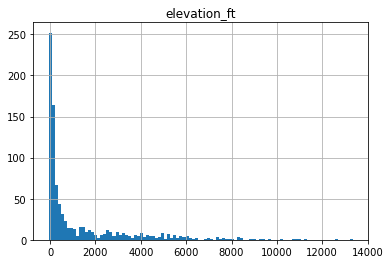

In [273]:
dataset.hist(column='elevation_ft', bins=100)
np.var(dataset['elevation_ft'])

dataset['elevation_ft']

array([[<AxesSubplot:title={'center':'max_length_ft'}>]], dtype=object)

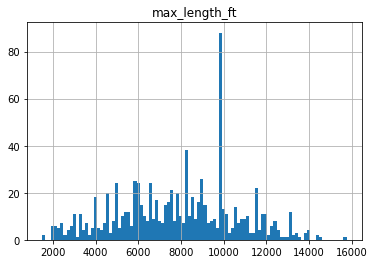

In [224]:
dataset.hist(column='max_length_ft', bins=100)

array([[<AxesSubplot:title={'center':'width_ft'}>]], dtype=object)

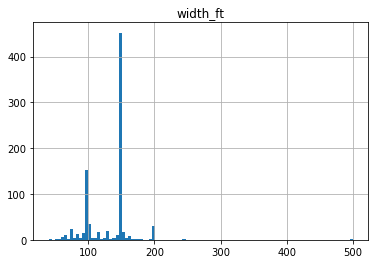

In [338]:
dataset.hist(column='width_ft', bins=100)

array([[<AxesSubplot:title={'center':'natural_dis_risk'}>]], dtype=object)

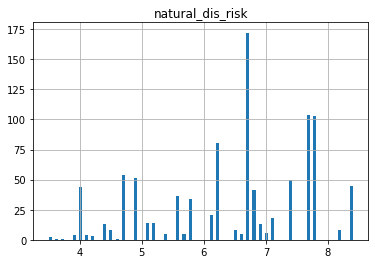

In [222]:
dataset.hist(column='natural_dis_risk', bins=100)

array([[<AxesSubplot:title={'center':'informrisk'}>]], dtype=object)

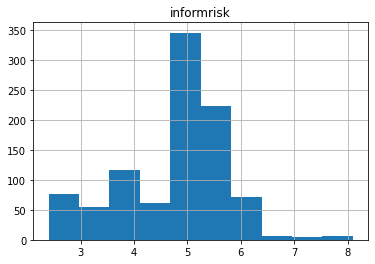

In [339]:
dataset.hist(column='informrisk')

0.0897198727031364

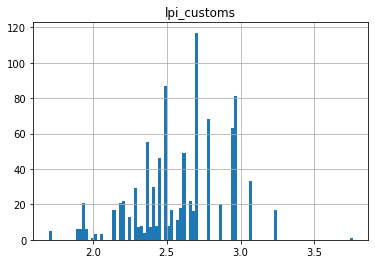

In [248]:
dataset.hist(column='lpi_customs', bins=100)
np.var(dataset['lpi_customs'])

0.1380120145354424

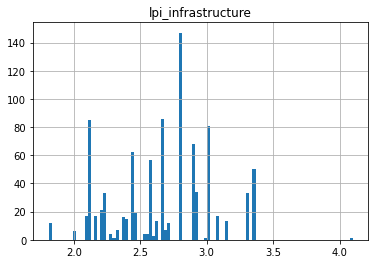

In [247]:
dataset.hist(column='lpi_infrastructure', bins=100)
np.var(dataset['lpi_infrastructure'])

array([[<AxesSubplot:title={'center':'airport_area'}>]], dtype=object)

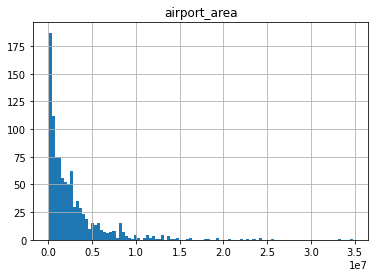

In [218]:
dataset.hist(column='airport_area', bins = 100)

<AxesSubplot:>

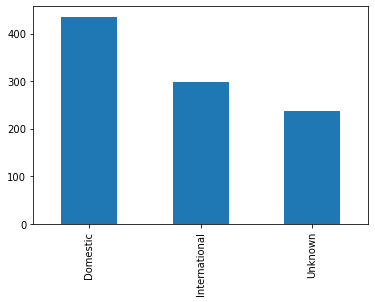

In [162]:
dataset['aptclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

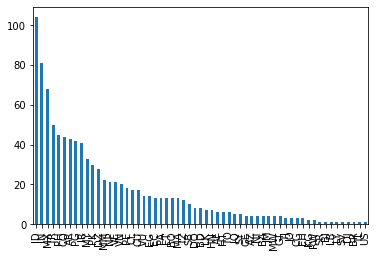

In [228]:
dataset['iso_country'].value_counts().plot(kind='bar')

<AxesSubplot:>

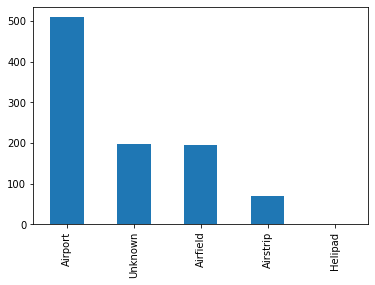

In [229]:
dataset['apttype'].value_counts().plot(kind='bar')

<AxesSubplot:>

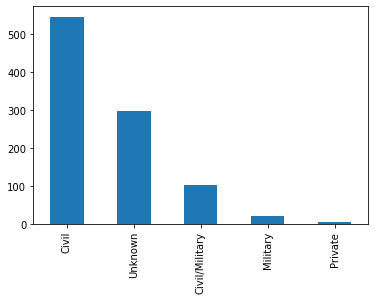

In [230]:
dataset['authority'].value_counts().plot(kind='bar')

<AxesSubplot:>

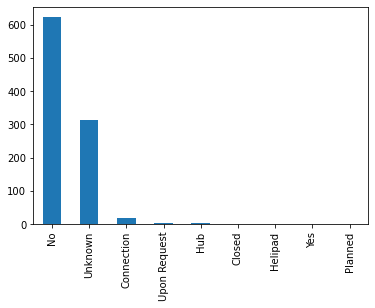

In [231]:
dataset['humuse'].value_counts().plot(kind='bar')

<AxesSubplot:>

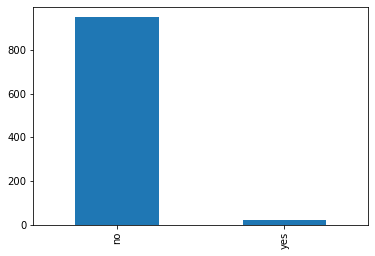

In [232]:
dataset['gard'].value_counts().plot(kind='bar')

<AxesSubplot:>

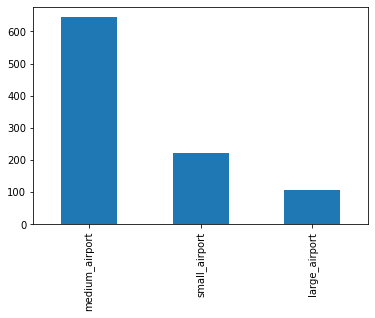

In [233]:
dataset['airport_type'].value_counts().plot(kind='bar')

In [256]:
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())])
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [257]:
# numeric_features = dataset.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = dataset.select_dtypes(include=['object']).drop(['iata'], axis=1).columns
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

In [264]:
numeric_data = dataset[['seaport_count', 'airport_count', 'build_count',
       'tourism_industrial_ratio', 'terminal_count', 'runways_count',
       'dist_city_1', 'dist_city_2', 'dist_city_3', 'population_around',
       'elevation_ft', 'lighted', 'max_length_ft', 'width_ft',
       'natural_dis_risk', 'informrisk', 'lpi_customs', 'lpi_infrastructure',
       'airport_area']]
numeric_data

seaport_count  airport_count  build_count  tourism_industrial_ratio  \
0                0              2           74                  4.934783   
1                0              1           95                  2.135135   
2                0              5         2465                 15.597561   
3                0              2          383                  0.359185   
4                0              1          101                  8.000000   
..             ...            ...          ...                       ...   
966              0              1        55685                  1.863636   
967              0              3          137                  3.206731   
968              0              1         4268                  6.223464   
969              0              5        12179                 11.969697   
970              0              0        42239                  8.076923   

     terminal_count  runways_count  dist_city_1  dist_city_2  dist_city_3  \
0                 1              1         7.50         0.00         0.00   
1                 2              2         9.44        52.67        60.91   
2                 2              1         3.92        42.09        93.66   
3                 1              2         7.79         8.55        24.41   
4                 0              2         4.57         0.00         0.00   
..              ...            ...          ...          ...          ...   
966               0              1         6.74        42.91        64.59   
967               1              2         9.44        82.54        96.23   
968               0              1        59.98        71.38        84.69   
969               1              1        47.27        51.62        79.66   
970               2              1         2.42        54.43        67.92   

     population_around  elevation_ft  lighted  max_length_ft  width_ft  \
0             164830.0         121.0      1.0         9905.0     148.0   
1             532622.0          16.0      1.0         9843.0     148.0   
2             570833.0           NaN      0.0            NaN       NaN   
3             533633.0          10.0      1.0        10169.0     148.0   
4               2535.0         616.0      1.0         9843.0     148.0   
..                 ...           ...      ...            ...       ...   
966          5003296.0          54.0      1.0         9915.0     148.0   
967           811910.0         187.0      1.0         6398.0     118.0   
968          1278477.0         853.0      1.0         5576.0      98.0   
969          6476031.0          50.0      1.0         9478.0     150.0   
970           190135.0        4115.0      0.0         4291.0      62.0   

     natural_dis_risk  informrisk  lpi_customs  lpi_infrastructure  \
0                 4.9         5.1         2.67                2.91   
1                 4.7         3.9         2.28                2.45   
2                 6.7         5.5         2.35                2.27   
3                 6.8         5.0         2.46                2.67   
4                 4.9         5.1         2.67                2.91   
..                ...         ...          ...                 ...   
966               5.1         5.1         2.66                2.72   
967               6.2         2.8         3.23                3.09   
968               6.2         2.8         3.23                3.09   
969               8.2         5.8         2.33                2.36   
970               4.5         4.8         2.58                2.56   

     airport_area  
0         3918622  
1         3726703  
2          715718  
3         3501077  
4         4203655  
..            ...  
966       2506390  
967        935325  
968        446403  
969       1986265  
970        322805  

[971 rows x 19 columns]

In [300]:
dataset.isna().sum() 

iata                          0
iso_country                   0
seaport_count                 0
airport_count                 0
build_count                   0
tourism_industrial_ratio      0
terminal_count                0
runways_count                 0
dist_city_1                   0
dist_city_2                   0
dist_city_3                   0
population_around             0
elevation_ft                 80
lighted                       0
max_length_ft                78
width_ft                    116
aptclass                      0
apttype                       0
authority                     0
humuse                        0
natural_dis_risk              3
informrisk                    3
lpi_customs                  25
lpi_infrastructure           25
gard                          0
airport_area                  0
airport_type                  0
dtype: int64

In [278]:
# from sklearn.preprocessing import Imputer
# imputer = SimpleImputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer.fit(numeric_data) 
# features = imputer.transform(features)

In [274]:
np.median(dataset['elevation_ft'])

nan

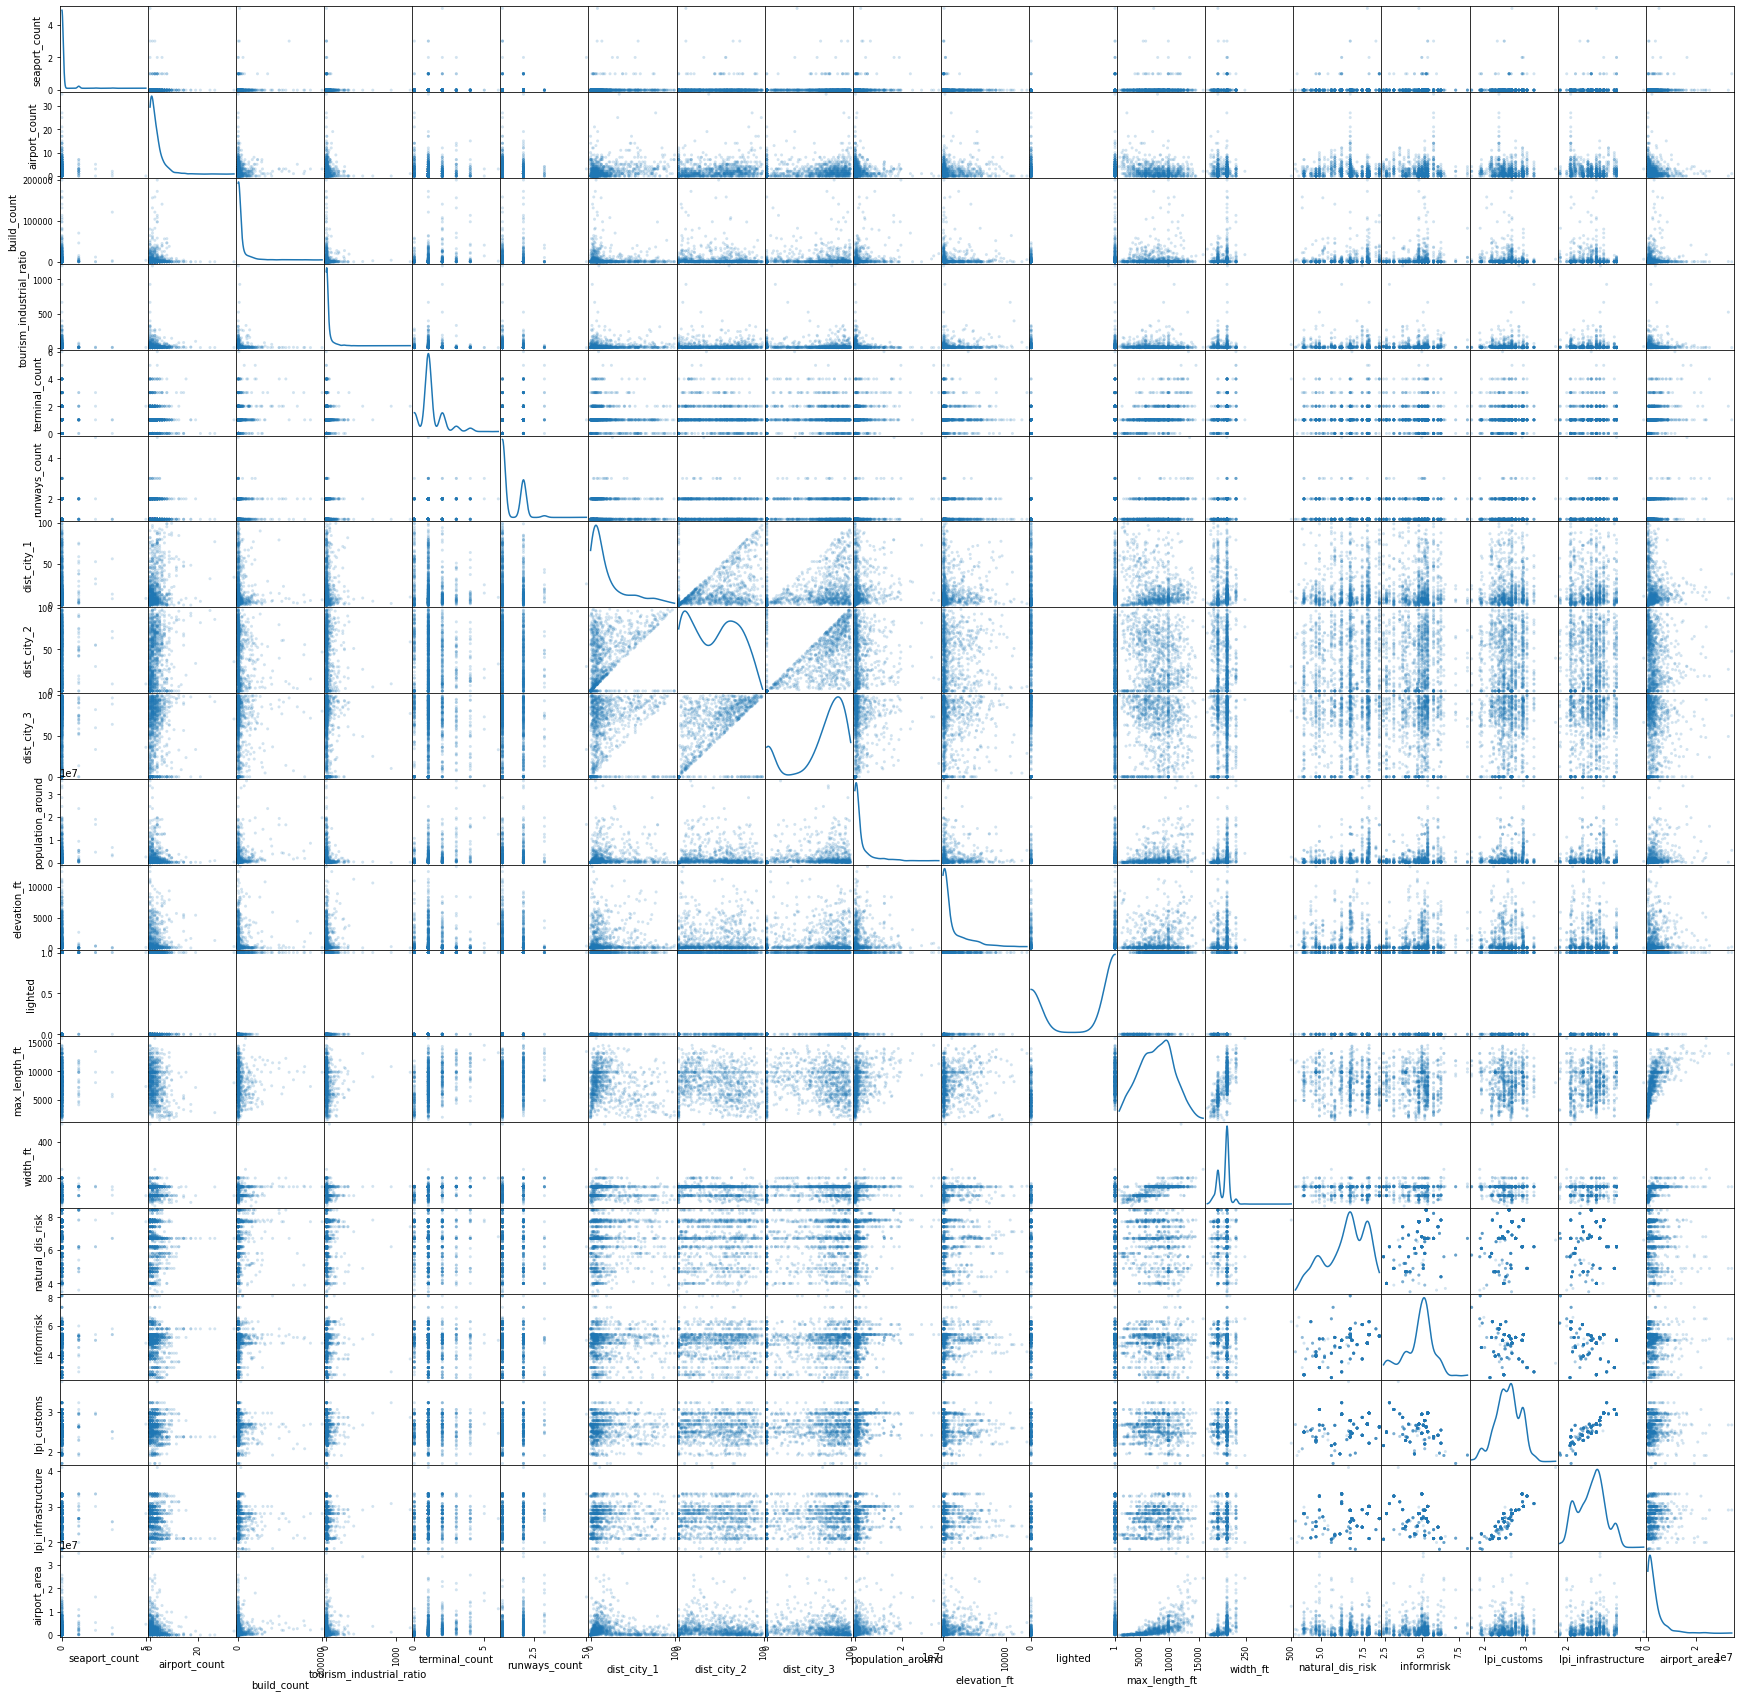

In [337]:
from pandas.plotting import scatter_matrix

#df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])

scatter_matrix(numeric_data, alpha=0.2, figsize=(30, 30), diagonal="kde");